<a href="https://colab.research.google.com/github/sleepbook53/Final-project/blob/main/03_03_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [49]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (12.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [11]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
ytb_cook = pd.read_csv('/content/drive/MyDrive/K-디지털 품질재단 - 빅데이터 분석/Final project/ytb_cook.csv')
ytb_zaitech =pd.read_csv('/content/drive/MyDrive/K-디지털 품질재단 - 빅데이터 분석/Final project/ytb_zaitech.csv')


In [3]:
len(ytb_cook), len(ytb_zaitech)


(401, 457)

# 전처리

In [74]:
ytb_sum =  pd.concat([ytb_cook, ytb_zaitech])

In [75]:
ytb_sum_work = pd.DataFrame()
ytb_sum_work['subtitle']= ytb_sum['subtitle']
ytb_sum_work['tag']= ytb_sum['tag']

In [76]:
ytb_sum_work = ytb_sum_work.reset_index()

In [77]:
ytb_sum_work = ytb_sum_work.drop(['index'],axis=1) 

In [78]:
ytb_sum_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subtitle  858 non-null    object
 1   tag       858 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


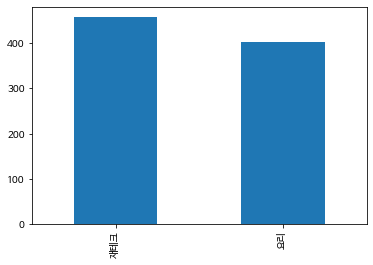

In [79]:
ytb_sum_work['tag'].value_counts().plot(kind='bar')

In [80]:
print(f'재테크 = {round(ytb_sum_work["tag"].value_counts()[0]/len(ytb_sum_work) * 100,3)}%')
print(f'요리 = {round(ytb_sum_work["tag"].value_counts()[1]/len(ytb_sum_work) * 100,3)}%')

재테크 = 53.263%
요리 = 46.737%


In [81]:
# 데이터 설정
X_data = ytb_sum_work['subtitle']
y_data = ytb_sum_work['tag']

print('자막개수: {}'.format(len(X_data)))
print('레이블 개수: {}'.format(len(y_data)))

자막개수: 858
레이블 개수: 858


In [82]:
# 데이터 비율 설정
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [83]:
print('--------훈련 데이터의 비율-----------')
print(f'제태크 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'요리 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
제태크 = 53.207%
요리 = 46.793%


In [84]:
print('--------테스트 데이터의 비율-----------')
print(f'제태크 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'요리 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
제태크 = 53.488%
요리 = 46.512%


In [85]:
# 토큰화/ 정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[522, 22026, 22027, 6279, 37, 2746, 7770, 359, 37967, 12657, 37, 587, 486, 37968, 178, 37969, 211, 5711, 15987, 37970, 37971, 6955, 1, 61, 51, 2414, 5712, 33, 4237, 12658, 10506, 15988, 6956, 37972, 6957, 12659, 37973, 37974, 37975, 37976, 51, 352, 940, 37977, 1153, 37978, 3965, 5250, 6280, 12660, 1454, 158, 37979, 3016, 1993, 37980, 12661, 37981, 330, 37982, 37983, 37984, 6279, 37985, 282, 37986, 359, 12662, 12663, 22028, 37987, 574, 242, 1840, 6958, 196, 1685, 37988, 10507, 115, 12664, 1241, 5251, 15989, 15, 1177, 22029, 89, 1526, 86, 940, 37989, 1686, 12665, 12659, 5252, 941, 5713, 5252, 37990, 277, 13, 15, 37991, 19, 3966, 781, 320, 696, 6, 12666, 9, 37992, 22030, 103, 991, 6, 32, 9, 37993, 37994, 22031, 278, 6959, 482, 37995, 13, 10508, 3333, 3161, 37996, 21, 22032, 1006, 15990, 37997, 37998, 90, 4238, 37999, 604, 2068, 1840, 2528, 38000, 12667, 345, 38001, 38002, 2529, 1737, 22033, 38003, 38004, 80, 22, 150, 38005, 38006, 3, 1359, 3739, 150, 22034, 1080, 7771, 9, 228, 1273, 1892

In [86]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'그': 1, '수': 2, '이': 3, '이렇게': 4, '안': 5, '게': 6, '있는': 7, '좀': 8, '한': 9, '더': 10, '음악': 11, '이런': 12, '뭐': 13, '거': 14, '많이': 15, '내가': 16, '때': 17, '잘': 18, '그래서': 19, '제가': 20, '그리고': 21, '이제': 22, '지금': 23, '근데': 24, '또': 25, '그런': 26, '것': 27, '다': 28, '너무': 29, '하는': 30, '때문에': 31, '그냥': 32, '하고': 33, '있어요': 34, '할': 35, '정도': 36, '진짜': 37, '같은': 38, '있습니다': 39, '되는': 40, '이게': 41, '저는': 42, '있고': 43, '해서': 44, '어떻게': 45, '거예요': 46, '돈을': 47, '어떤': 48, '될': 49, '그러면': 50, '정말': 51, '그렇게': 52, '번': 53, '같아요': 54, '걸': 55, '그럼': 56, '좋은': 57, '건': 58, '조금': 59, '하면': 60, '다음에': 61, '왜': 62, '아': 63, '거죠': 64, '되요': 65, "'": 66, '넣고': 67, '두': 68, '되고': 69, '내': 70, '우리': 71, '보면': 72, '굉장히': 73, '사실': 74, '거야': 75, '고': 76, '그게': 77, '있는데': 78, '한번': 79, '자': 80, '수도': 81, '이거': 82, '많은': 83, '1': 84, '네': 85, '됩니다': 86, '돼': 87, '우리가': 88, '큰': 89, '다른': 90, '합니다': 91, '약간': 92, '부동산': 93, '다시': 94, '그런데': 95, '해야': 96, '돈이': 97, '수가': 98, '돼요': 99, '되게': 100, '있다': 101, '있어': 1

In [87]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 81716
단어 집합(vocabulary)에서 희귀 단어의 비율: 68.27760231279557
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.822446621524799


In [88]:
# 단어  저장
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 119683


자막의 최대 길이 : 9045
자막의 평균 길이 : 803.642857


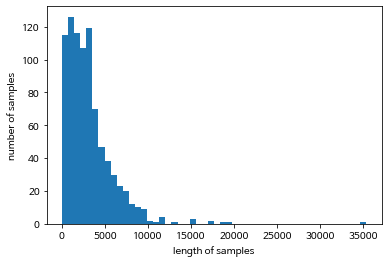

In [89]:
print('자막의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('자막의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [90]:
# 패딩
max_len = 9045
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len+1)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (686, 9046)


In [91]:
X_train_padded

array([[     0,      0,      0, ...,   6967,   2629,     66],
       [     0,      0,      0, ...,    261,   1457,     66],
       [     0,      0,      0, ...,    242,    222,     66],
       ...,
       [     0,      0,      0, ...,   8602,    693,     66],
       [     0,      0,      0, ..., 119584,     11,     66],
       [     0,      0,      0, ...,    242,    222,     66]], dtype=int32)

In [92]:
X_train_padded.shape, y_train.shape

((686, 9046), (686,))

In [93]:
vocab_size

119683

In [94]:
embedding_dim

32

In [95]:
y_train

75      요리
281     요리
694    재테크
542    재테크
296     요리
      ... 
279     요리
24      요리
775    재테크
301     요리
554    재테크
Name: tag, Length: 686, dtype: object

In [177]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Flatten
from tensorflow.keras.models import Sequential

# 벡터 차원 32, 은닉 상태 크기 32
embedding_dim = 32
hidden_units = 32


model = Sequential()
model.add(Embedding( vocab_size, embedding_dim, input_length=X_train_padded.shape[1]))
model.add(SimpleRNN(hidden_units))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [178]:
# 모델 컴파일
# 배치크기 64, 검증데이터 20%, 로지스틱, 시그모이드, 크로스 엔트로피
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [179]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 9046, 32)          3829856   
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,831,969
Trainable params: 3,831,969
Non-trainable params: 0
_________________________________________________________________


In [180]:
# y_tarin 문자열로 치환
for i in y_train :
  if i == '요리':
    y_train =  y_train.replace( '요리', 1)
  if i== '재테크' :
    y_train =  y_train.replace('재테크',0)

In [168]:
for i in y_test :
  if i == '요리':
    y_test =  y_test.replace( '요리', 1)
  if i== '재테크' :
    y_test =  y_test.replace('재테크',0)


In [186]:
print(y_test)
print(y_train)

534    0
84     1
185    1
715    0
805    0
      ..
425    0
513    0
777    0
495    0
211    1
Name: tag, Length: 172, dtype: int64
75     1
281    1
694    0
542    0
296    1
      ..
279    1
24     1
775    0
301    1
554    0
Name: tag, Length: 686, dtype: int64


In [182]:
# 모델 실행
history = model.fit(X_train_padded, y_train, epochs= 2, batch_size=64, validation_split=0.2)

Epoch 1/2
9/9 [==============================] - 95s 10s/step - loss: 0.6730 - acc: 0.5785 - val_loss: 0.6261 - val_acc: 0.6522
Epoch 2/2
9/9 [==============================] - 93s 10s/step - loss: 0.4377 - acc: 0.9270 - val_loss: 0.6408 - val_acc: 0.5725


In [173]:
# 테스트 정확도 확인
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len+1)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

6/6 [==============================] - 2s 381ms/step - loss: 0.5783 - acc: 0.6686

 테스트 정확도: 0.6686


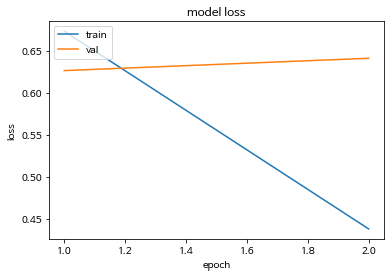

In [183]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()